## Importar librerias y carga de datos de prueba

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1, 1.5, 2, 2], random_state=7)

In [3]:
df_blobs = pd.DataFrame({
    'x1': x[:, 0],
    'x2': x[:, 1],
    'y': y 
})

In [4]:
df_blobs

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [5]:
def plot_2d_cluster(x, y, ax):
    y_unique = pd.Series(y).unique()

    for _ in y_unique:
        x[y==_].plot(
            title = f'{len(y_unique)} clusters',
            kind = 'scatter',
            x = 'x1',
            y = 'x2',
            ax = ax
        )


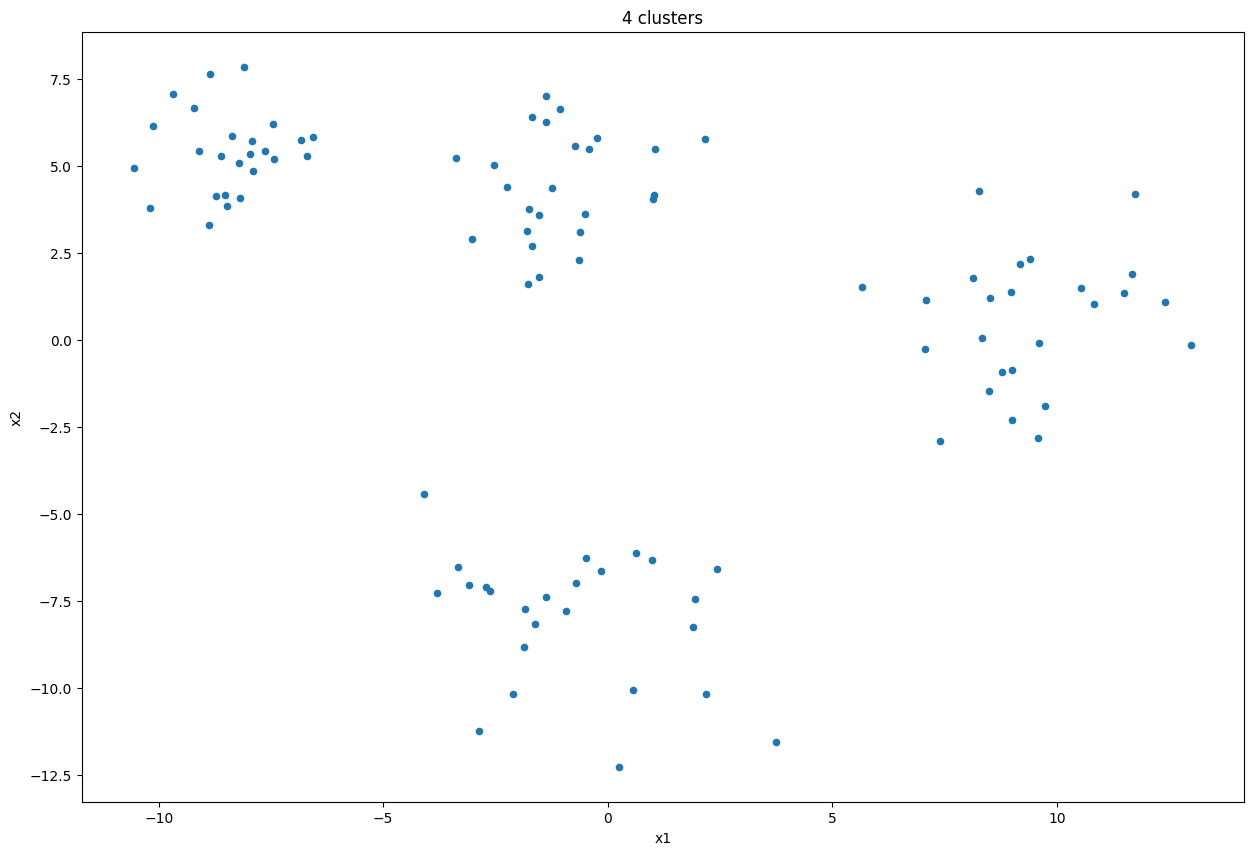

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(15, 10))
x, y = df_blobs[['x1', 'x2']], df_blobs['y']
plot_2d_cluster(x, y, axs)

## Aplicando clustering

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=7)

In [23]:
y_pred = kmeans.fit_predict(x)

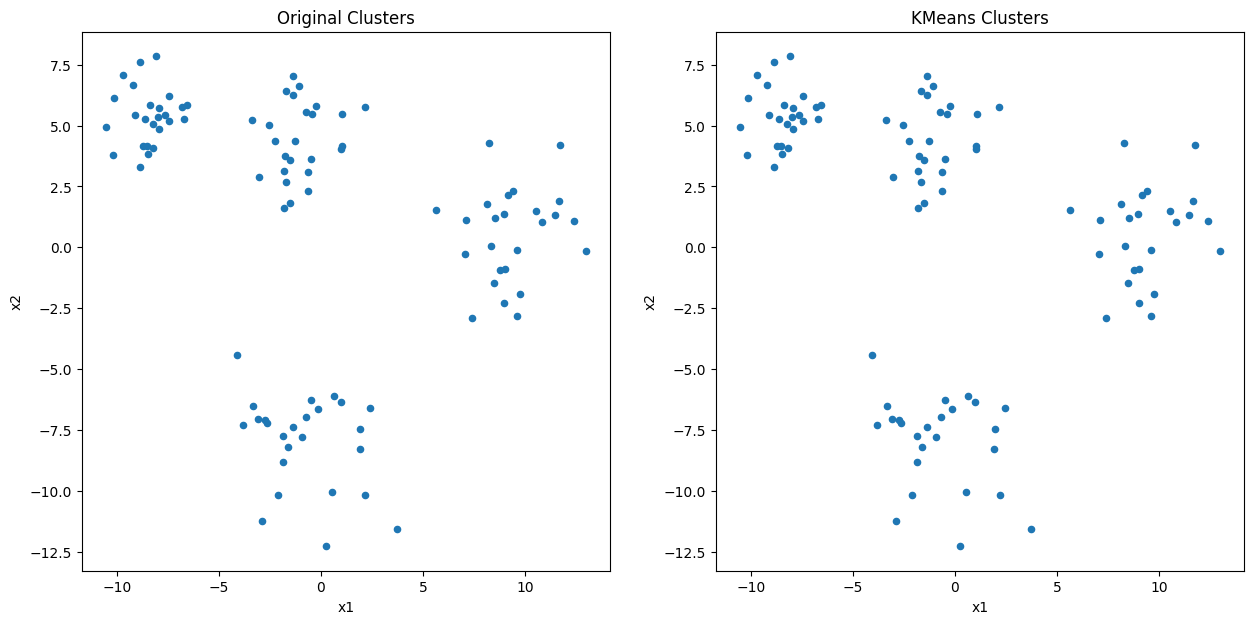

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plot_2d_cluster(x, y, axs[0])
plot_2d_cluster(x, y_pred, axs[1])

axs[0].set_title('Original Clusters')
axs[1].set_title('KMeans Clusters')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
plt.show()